# Data Cleaning 🧹

## Handling Missing Values

### Take a First Look at the Data

In [12]:
import pandas as pd
import numpy as np

nfl_data = pd.read_csv(r'C:\Users\migsk\Documents\Kaggle Courses\kaggle-courses\Data Cleaning Course\detailed_nfl_play_by_play_data\NFL Play by Play 2009-2017 (v4).csv', low_memory=False)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

np.random.seed(0)

A primeira coisa a fazer quando você obtem um novo *dataset* é dar uma olhada nele. Isso permite que você veja se tudo foi lido corretamente e dá uma ideia do que está acontecendo com os dados. Nesse caso, vamos ver se existe alguns valores ausentes, que será representado com <font color='FireBrick'>**Nan**</font> ou <font color='FireBrick'>**None**</font>.

In [2]:
nfl_data.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,30.0,30.0,0,0,0.0,NaN,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,0,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,S.Logan,NaN,M.Griffin,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,42.0,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,1,5,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-3,8,0,left,0,NaN,NaN,None,0,NaN,NaN,H.Ward,00-0017162,1,NaN,NaN,NaN,C.Hope,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,47.0,53.0,5,2,0.0,0.0,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,0,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,W.Parker,00-0022250,1,right,end,NaN,None,0,NaN,NaN,NaN,S.Tulloch,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,44.0,56.0,8,2,0.0,0.0,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Incomplete Pass,Deep,34,0,0,right,0,NaN,NaN,None,0,NaN,NaN,M.Wallace,00-0026901,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,44.0,56.0,8,2,0.0,1.0,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,0,0,NaN,NaN,NaN,0,0,Clean,Punt,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


### How Many Missing Data Points Do We Have?

Olhando as 5 primeiras linhas concluímos que existe dados ausentes. Vamos ver quantos deles existem em cada coluna.

In [17]:
missing_values_count = nfl_data.isnull().sum()

# Dados ausente das 10 primeiras colunas
missing_values_count[0:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

São muitos dados ausentes! Pode ser vantajoso ver a porcentagem dos valores ausentes no nosso *dataset* para nos dar um senso de escala desse problema: 

In [19]:
# Faz o produto do nfl_data.shape, ou seja, colunas * linhas = qtd de células
total_cells = np.product(nfl_data.shape)

total_missing = missing_values_count.sum()

percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

24.87214126835169


Quase 1/4 das células desse *dataset* estão vazias!

### Figure Out Why The Data Is Missing

Para lidar com dados ausentes, você precisará usar sua intuição para descobrir porque os valores estão ausentes. Uma das mais importantes perguntas que você pode fazer a si mesmo para ajudá-lo a desvendar isso é:

> <font color='LimeGreen'>**Este valor está faltando porque não foi registrado ou porque não existe?**</font>

Se um valor está faltando porque não existe, não faz sentido tentar adivinhar o que pode ser. Esses valores você provavelmente deseja manter como <font color='FireBrick'>**Nan**</font>. Por outro lado, se o valor ausente é porque não foi registrado, então você pode tentar adivinhar o que poderia ter sido com base nos outros valores nessa coluna e linha. Isso é chamado de <font color='Gold'>**imputation**</font>

In [21]:
missing_values_count[0:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

Olhando a documentação do *dataset*, podemos observar que essa coluna tem informações sobre o número de segundos restantes no jogo quando a jogada foi feita. Isso significa que esses valores provavelmente estão ausentes pois não foram registrados, e não porque eles não existem. Portanto, faria sentido tertarmos adivinhar quais deveriam ser, em vez de apenas deixá-los como <font color='FireBrick'>**NaN**</font>.

Por outro lado, aqui estão outros campos, como *'PenalizedTeam'* que também possui muitos dados ausentes. Nesse caso, porém, falta o campo porque se não houve pênalti não faz sentido dizer qual time foi penalizado. Para essa coluna, faria mais sentido deixá-la vazia ou adicionar um terceiro valor como <font color='FireBrick'>**'neither'**</font> e usá-lo para substituir os <font color='FireBrick'>**NaN**</font>.

> 🧩 <font color='LimeGreen'>**DICA:** Ler a documentação do *dataset* é muito importante! Se você estiver trabalhando com um *dataset* que obteve de outra pessoa, também pode tentar contatá-la para obter mais informações.</font>

⚠️ <font color='Gold'>Se você estiver fazendo uma análise de dados muito cuidadosa, este é o ponto que você examinaria cada coluna individualmente pra descobrir a melhor estratégia para preencher os valores ausentes.</font>

### Drop Missing Values

Se você está com pressa ou não tem uma razão para descobrir o porque dos valores ausentes, uma opção que você tem é apenas remover qualquer linha ou coluna que possua valores ausentes.

> ⚠️ <font color='Gold'>**ATENÇÃO:** Essa abordagem não é recomendada para projetos importantes! Geralmente vale a pena reservar um tempo para examinar seus dados e todas as colunas com valores ausentes, **uma por uma**, para realmente conhecer seu *dataset*</font>.

Agora, se você tiver certeza que quer remover linhas com valores ausentes, pandas tem uma função para isso, ela se chama **dropna():**

In [22]:
# Remove todas as linhas que contém valores ausentes
nfl_data.dropna()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


Eita! Parece que removemos todos os nosso dados 😱. Isso é porque toda linha do nosso *dataset* tem pelo menos um valor ausente. Podemos ter mais sorte removendo todas as colunas que têm pelo menos um valor ausente.

In [24]:
columns_with_na_dropped = nfl_data.dropna(axis='columns')
columns_with_na_dropped.head()

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,Touchdown,Safety,Onsidekick,PlayType,Passer_ID,PassAttempt,AirYards,YardsAfterCatch,QBHit,InterceptionThrown,Rusher_ID,RushAttempt,Receiver_ID,Reception,Fumble,Sack,Challenge.Replay,Accepted.Penalty,Penalty.Yards,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,0,0,0,Kickoff,None,0,0,0,0,0,None,0,None,0,0,0,0,0,0,PIT,TEN,0,None,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,0,0,0,Pass,00-0022924,1,-3,8,0,0,None,0,00-0017162,1,0,0,0,0,0,PIT,TEN,0,None,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,0,0,0,Run,None,0,0,0,0,0,00-0022250,1,None,0,0,0,0,0,0,PIT,TEN,0,None,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,0,0,0,Pass,00-0022924,1,34,0,0,0,None,0,00-0026901,0,0,0,0,0,0,PIT,TEN,0,None,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,0,0,0,Punt,None,0,0,0,0,0,None,0,None,0,0,0,0,0,0,PIT,TEN,0,None,3,3,3,3,3,0.0,0.0,2009


Vamos dar uma olhadinha em quanto dados nós perdemos:

In [25]:
print(f"Colunas no dataset original: {nfl_data.shape[1]}")
print(f"Colunas no dataset com valores ausentes removidos: {columns_with_na_dropped.shape[1]}")

Colunas no dataset original: 102
Colunas no dataset com valores ausentes removidos: 41


Perdemos muitos dados, mas removemos com sucesso todos os <font color='FireBrick'>**Nan**</font> de nossos dados.

### Filling In Missing Values Automatically

Outra opção é tentar preencher os valores que faltam. Vamos dar uma olhada em uma subseção dos dados:

In [26]:
subset_nfl_data = nfl_data.loc[:, 'EPA': 'Season'].head()
subset_nfl_data

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


Nós podemos usar a função do pandas **fillna()** para preencher valores ausentes de um DataFrame. Uma opção que nós temos é especificar quais valores queremos para substituir os <font color='FireBrick'>**Nan**</font>. Vamos preenche-los com o valor 0:

In [27]:
subset_nfl_data.fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


Também poderíamos ser um pouco mais sagaz e substituir os valores ausentes por qualquer valor que vier diretamente depois dele na mesma coluna.

> 🤯 **Isso faz muito sentido para um conjunto de dados em que as observações têm algum tipo de ordem lógica**

In [28]:
# Substituindo todos valores ausentes que vier logo após na mesma coluna
subset_nfl_data.fillna(method='bfill', axis=0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


Como a última linha não tem valor após, vamos preenche-lá com 0 mesmo:

In [29]:
subset_nfl_data.fillna(method='bfill', axis=0).fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


## Scaling and Normalization

### Get our environment set up

In [3]:
import pandas as pd
import numpy as np

from scipy import stats

from mlxtend.preprocessing import minmax_scaling

import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)

### Scaling VS. Normalization: What's the difference?

Uma das razões que é fácil de confundir *Scaling* com *Normalization* é porque as vezes os termos são usados de maneira trocada e, para tornar isso ainda mais confuso, eles são muito similares. Ambos casos você vai transformar os valores de variáveis numéricas para que os pontos de dados transformados tenham propriedades úteis específicas. A diferença é:

- **Scaling**, você está mudando o intervalo de seus dados.
- **Normalization**, você está mudando a forma de distribuição dos seus dados.

Vamos aprofundar um pouco mais!

### Scaling

Isso significa que você está transformando seus dados para que caibam em uma escala específica, como 0-100 ou 0-1. Você deseja dimensionar os dados quando estiver usando métodos baseados em medidas de quão distantes estão os pontos de dados. Com esses algoritmos, uma alteração de 1 unidade em qualquer recurso numérico recebe a mesma importância.

Ao dimensionar suas variáveis, você pode ajudar a comparar diferente variáveis em pé de igualdade. Para ajudar a solidificar a aparência do dimensinonamento, vejamos um exemplo inventado:

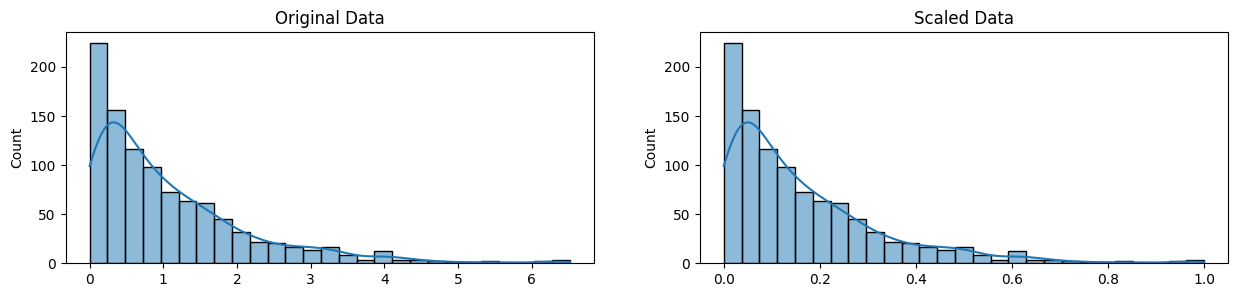

In [5]:
# gera 1000 pontos de dados aleatoriamente extraídos de uma distribuição exponencial
original_data = np.random.exponential(size=1000)

# min-max escala os dados entre 0-1
scaled_data = minmax_scaling(original_data, columns=[0])

# constroe os dois gráficos juntos para comparar
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled Data")
plt.show()

<font color='Gold'>**!**</font> Observe que a forma dos dados não muda, mas em vez de variar de 0 a 6, agora varia de 0 a 1.

### Normalization

O dimensionamento **(Scaling)** apenas altera o intervalo de seus dados. A normalização **(Normalization)** é uma transformação mais radical. Seu objetivo é mudas suas observações para que possam ser descritas como uma distribuição normal.

> <font color='Orange'>**Normal Distribution</font><font color='white'> (destribuição normal):</font>** Também conhecido como *curva do sino* ou *Gaussian distribution*, é uma distribuição estatística específica em que obeservações aproximadamente iguais ficam acima e abaixo da média, a média e a mediana são iguais, e há mais observações mais próximas da média.

No geral, você normalizará seus dados caso use uma técnica de aprendizado de máquina ou estatística que supõe que seus dados sejam normalmente distribuídos. O método que usaremos chama *Box-Cox Transformation*. Bora dar uma olhada!

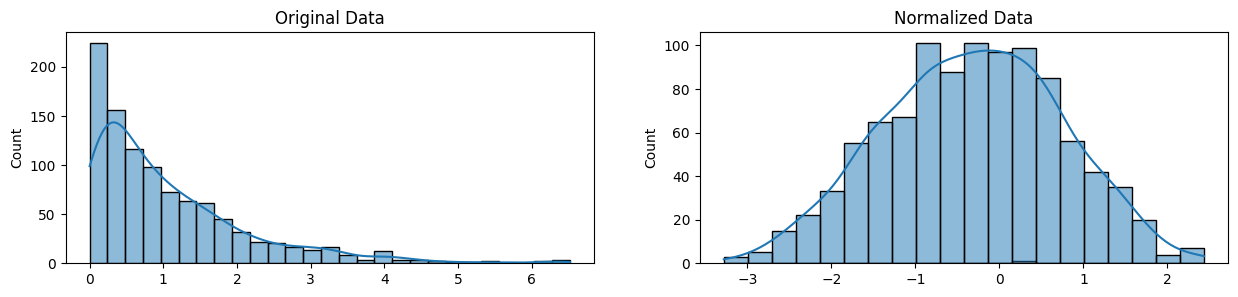

In [6]:
# normalizar os dados exponenciais com boxcox
normalized_data = stats.boxcox(original_data)

# construa os dois gráficos juntos para comparar
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized Data")
plt.show()

<font color='Gold'>**!**</font> Perceba que agora o formato dos dados mudou, tomando a forma similar a de um sino.

## Parsing Dates

### Set up

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

landslides = pd.read_csv(r"C:\Users\migsk\Documents\Kaggle Courses\kaggle-courses\Data Cleaning Course\datas\catalog.csv")

np.random.seed(0)

### Check the data type of our date column

In [2]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


Nós vamos trabalhar com a coluna 'Date'. Vamos verificar se realmente contém datas:

In [4]:
landslides['date'].head()

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object

Sim, são datas! Mas não é porque eu que sou humano consigo dizer que são datas, o python também conseguirá. Perceba que na parte de baixo da saída do `head()` você pode ver que diz que o tipo de dado da coluna é *object*.

> Pandas usa *object* dtype para armazenar vários tipos de dados, mas o mais comum quando você vê uma coluna com o tipo *object* é quando tem *strings* nela.

Você pode conferir o tipo de uma coluna da seguinte maneira:

In [6]:
landslides['date'].dtype

dtype('O')

### Convert our date columns to datetime

Podemos determinar qual é o formato de nossas datas com um guia chamado *strtime directive*. A ideia básica é que você precisa apontar quais partes da data estão onde e qual pontuação está entre elas. Existem várias possibilidades de converter datas, mas a mais comum é `%d` para dias, `%m` para meses, `%y` para ano com 2 dígitos e `%Y` para ano com 4 dígitos.

Alguns exemplos:
- 1/17/07 tem o formato `%m/%d/%y`
- 17-1-2007 tem o formato `%d-%m-%Y`

Olhando para nossa coluna de datas, podemos ver que ela está no formato "mês/dia/ano_2_digitos", então podemos usar a sintaxe do primeiro exemplo para converter nossas datas:

In [7]:
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")

landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

🤯 **PEGA VISÃO:**

- **E se eu encontrar um erro com vários formatos de datas?** Enquanto especificamos o formato da data aqui, as vezes você irá de deparar com um erro quando exite vários formatos de datas em uma única coluna. Se isso acontecer, você pode usar o Pandas para concluir qual deve ser o formato de data correto:

`landslides['date_parsed'] = pd.to_datetime(landslides['date'], infer_datetime_format=True)`

- **Então porque não usar sempre o `infer_datetime_format = True`?** Existe duas grandes razões para nem sempre fazer com que o Pandas adivinhe o formato da data. A primeira é que o Pandas nem sempre é capaz de descobrir o formato correto, especialmente se a entrada de dados estiver estranha. A segunda é que é muito mais lento que especificar o formato exato da data.

### Select the day of the month

In [10]:
day_of_month = landslides['date_parsed'].dt.day
day_of_month.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

Se tentassemos conseguir a mesma informação da coluna original, teríamos um erro: `AttributeError: Can only use .dt acessor with datetimelike values`. Isso porque `dt.day` não sabe como lidar com uma coluna do tipo *object*. Mesmo que nosso *DataFrame* tenha datas nele, precisamos converter as datas para conseguir interagir com elas de uma maneira útil.

### Plot the day of the month to check the date parsing

Uma das coisas mais perigosas em converter datas é misturar os meses com os dias. A função `to_datetime()` possui mensagens de erros muito úteis, mas não dói checar novamente os dias do mês que extraímos fazem sentido.

Para fazer isso vamos *plotar* um histograma dos dias do mês. Esperamos que tenha valores entre 1 e 31 e, como não há razão para supor que os deslizamentos de terra sejam mais comuns em alguns dias do mês do que em outros, uma distribuição relativamente uniforme. (Com uma queda em 31 porque nem todos os meses têm 31 dias). Vejamos:

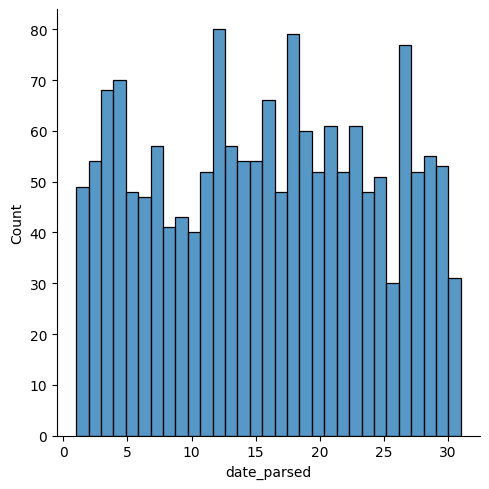

In [13]:
day_of_month = day_of_month.dropna()

sns.displot(day_of_month, kde=False, bins=31);